# **Setup**

In [56]:
!python --version

from psutil import *
print(f'CPU Cores: {cpu_count()}')
print(f'System Memory: {virtual_memory()[0]/(1024**3)} GB')

Python 3.11.6
CPU Cores: 16
System Memory: 15.692092895507812 GB


In [57]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os 
from zipfile import ZipFile
from IPython.display import clear_output

# **Data Import**

## **Download & Extract**

* https://www.kaggle.com/datasets/edumagalhaes/quality-prediction-in-a-mining-process

In [58]:
!kaggle datasets download -d edumagalhaes/quality-prediction-in-a-mining-process


  0%|          | 0.00/50.9M [00:00<?, ?B/s]
  2%|▏         | 1.00M/50.9M [00:00<00:25, 2.03MB/s]
  6%|▌         | 3.00M/50.9M [00:00<00:08, 5.69MB/s]
 10%|▉         | 5.00M/50.9M [00:00<00:06, 7.26MB/s]
 16%|█▌        | 8.00M/50.9M [00:01<00:04, 11.1MB/s]
 20%|█▉        | 10.0M/50.9M [00:01<00:03, 11.7MB/s]
 24%|██▎       | 12.0M/50.9M [00:01<00:03, 11.9MB/s]
 27%|██▋       | 14.0M/50.9M [00:01<00:03, 12.2MB/s]
 31%|███▏      | 16.0M/50.9M [00:01<00:03, 12.1MB/s]
 35%|███▌      | 18.0M/50.9M [00:01<00:02, 12.2MB/s]
 39%|███▉      | 20.0M/50.9M [00:02<00:02, 12.3MB/s]
 43%|████▎     | 22.0M/50.9M [00:02<00:02, 12.3MB/s]
 47%|████▋     | 24.0M/50.9M [00:02<00:02, 12.7MB/s]
 51%|█████     | 26.0M/50.9M [00:02<00:02, 12.9MB/s]
 55%|█████▍    | 28.0M/50.9M [00:02<00:01, 12.5MB/s]
 59%|█████▉    | 30.0M/50.9M [00:02<00:01, 12.4MB/s]
 63%|██████▎   | 32.0M/50.9M [00:02<00:01, 13.0MB/s]
 67%|██████▋   | 34.0M/50.9M [00:03<00:01, 13.0MB/s]
 71%|███████   | 36.0M/50.9M [00:03<00:01, 12.9MB/s]
 

In [59]:
with ZipFile('quality-prediction-in-a-mining-process.zip','r') as zip_ref:
    # Get list of file names in zip
    list_of_files = zip_ref.namelist()
    print('No. Of Files In Zip File: ',len(list_of_files),'\n')
    print(list_of_files)

No. Of Files In Zip File:  1 

['MiningProcess_Flotation_Plant_Database.csv']


In [60]:
# Extract Zip File Contents In Main Directory
with ZipFile('quality-prediction-in-a-mining-process.zip','r') as zip_ref:
    # Get list of file names in zip
    list_of_files = zip_ref.namelist()

    for file in list_of_files:
        file_content = zip_ref.read(file)
        with open(os.path.basename(file), "wb") as f:
                f.write(file_content)

os.remove('quality-prediction-in-a-mining-process.zip')

## **Load Data**

In [61]:
df = pd.read_csv('MiningProcess_Flotation_Plant_Database.csv')
os.remove('MiningProcess_Flotation_Plant_Database.csv')

print(df.shape)
print(df.columns)
df.head()

(737453, 24)
Index(['date', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')


,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


## **Data Inspection**

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

## **Missing Value Check**

In [63]:
df.isna().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

## **Column Rename**

In [64]:
df.rename(columns={'date':'Date',
                   '% Iron Feed': 'Iron_FPct',
                   '% Silica Feed': 'Silica_FPct',
                   'Starch Flow':'Starch_Flow',
                   'Amina Flow':'Amina_Flow',
                   'Ore Pulp Flow':'OP_Flow',
                   'Ore Pulp pH':'OP_pH',
                   'Ore Pulp Density':'OP_Density',
                   'Flotation Column 01 Air Flow':'FC_AirFlow01',
                   'Flotation Column 02 Air Flow':'FC_AirFlow02',
                   'Flotation Column 03 Air Flow':'FC_AirFlow03',
                   'Flotation Column 04 Air Flow':'FC_AirFlow04',
                   'Flotation Column 05 Air Flow':'FC_AirFlow05',
                   'Flotation Column 06 Air Flow':'FC_AirFlow06',
                   'Flotation Column 07 Air Flow':'FC_AirFlow07',
                   'Flotation Column 01 Level':'FC_Level01',
                   'Flotation Column 02 Level':'FC_Level02',
                   'Flotation Column 03 Level':'FC_Level03',
                   'Flotation Column 04 Level':'FC_Level04',
                   'Flotation Column 05 Level':'FC_Level05',
                   'Flotation Column 06 Level':'FC_Level06',
                   'Flotation Column 07 Level':'FC_Level07',
                   '% Iron Concentrate':'Iron_Pct',
                   '% Silica Concentrate':'Silica_Pct'                
                   }, inplace=True)

df.head()

,Date,Iron_FPct,Silica_FPct,Starch_Flow,Amina_Flow,OP_Flow,OP_pH,OP_Density,FC_AirFlow01,FC_AirFlow02,...,FC_AirFlow07,FC_Level01,FC_Level02,FC_Level03,FC_Level04,FC_Level05,FC_Level06,FC_Level07,Iron_Pct,Silica_Pct
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


## **Datatype Conversion**

## **Date Span**

In [76]:
print('Process Data Start Time: ',df['Date'].min())
print('Process Data End Time: ',df['Date'].max()) 

Process Data Start Time:  2017-03-10 01:00:00
Process Data End Time:  2017-09-09 23:00:00


## **Correlation Heatmap**

In [65]:
# Convert Data Column
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d %H:%M:%S')

# Convert Numeric Columns
for col in df.drop('Date',axis=1).columns:
    print(col)
    df[col] = df[col].str.replace(',','.').astype(float)
    print('\n')
    clear_output(wait=True)

# Check    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          737453 non-null  datetime64[ns]
 1   Iron_FPct     737453 non-null  float64       
 2   Silica_FPct   737453 non-null  float64       
 3   Starch_Flow   737453 non-null  float64       
 4   Amina_Flow    737453 non-null  float64       
 5   OP_Flow       737453 non-null  float64       
 6   OP_pH         737453 non-null  float64       
 7   OP_Density    737453 non-null  float64       
 8   FC_AirFlow01  737453 non-null  float64       
 9   FC_AirFlow02  737453 non-null  float64       
 10  FC_AirFlow03  737453 non-null  float64       
 11  FC_AirFlow04  737453 non-null  float64       
 12  FC_AirFlow05  737453 non-null  float64       
 13  FC_AirFlow06  737453 non-null  float64       
 14  FC_AirFlow07  737453 non-null  float64       
 15  FC_Level01    737

# **Data Exploration**

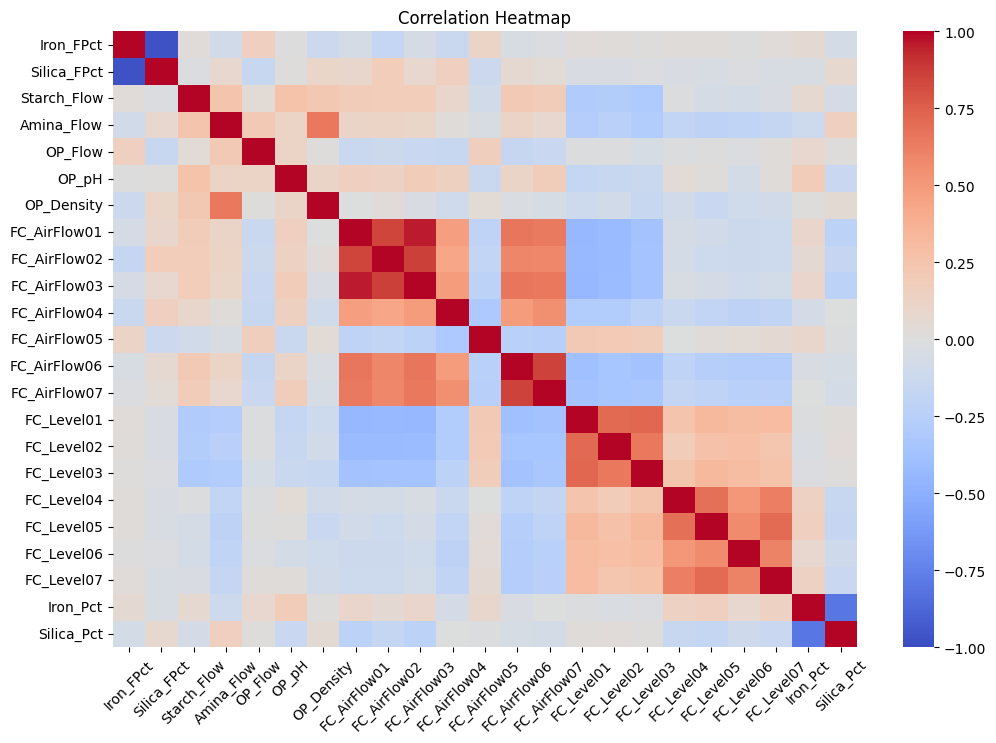

In [74]:
plt.figure(figsize=(12,8))
sns.heatmap(df.drop('Date',axis=1).corr(),annot=False,vmin=-1,vmax=1,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.show()